# Low Rank Decomposition

定義：低秩分解是指使**用兩個或多個rank較低的矩陣乘積**來**近似**表示一個**rank較高的矩陣**的方法。

# 矩陣的Rank（秩）

矩陣的rank指的是矩陣中線性無關行或列的最大數目。這意味著rank是矩陣所能表示的最大線性無關向量的數量。

## 定義
- **行rank**：矩陣中線性無關行向量的最大數目。
- **列rank**：矩陣中線性無關列向量的最大數目。

對於任意矩陣，行rank和列rank總是相等的，因此我們只需提到矩陣的rank，而不需區分行rank或列rank。

## 例子
假設有一個矩陣 \($A$\)：


$A$ = 
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix}


通過行簡化矩陣，可以得出這個矩陣的rank：


\begin{pmatrix}
1 & 2 & 3 \\
0 & -3 & -6 \\
0 & 0 & 0
\end{pmatrix}


在行簡化形式中，矩陣有兩個非零row，因此這個矩陣的rank是2。

## 性質
- 如果一個 \(m $\times$ n\) 的矩陣 \(A\) 的rank是 \($r$\)，則 \($r \leq \min(m, n)$\)。
- 矩陣的rank不會超過它的行數或列數。
- 矩陣的rank為零當且僅當矩陣是零矩陣。

## 應用
- **線性方程組**：矩陣的rank可以用來判斷線性方程組是否有解，以及解的唯一性。
- **線性變換**：矩陣的rank描述了線性變換的維度，即變換後的向量空間的維數。
- **數據分析**：在主成分分析（PCA）中，矩陣的rank幫助確定數據的有效維數，從而進行降維處理。

## 計算方法
1. **行簡化法**：通過初等行變換將矩陣轉換為簡化階梯形矩陣，非零行的數目即為矩陣的rank。
2. **SVD分解**：使用奇異值分解（SVD）來計算矩陣的rank，奇異值為零的數目即為矩陣rank的補數。

## 參考資料
* [奇異值分解 (SVD)](https://ccjou.wordpress.com/2009/09/01/%E5%A5%87%E7%95%B0%E5%80%BC%E5%88%86%E8%A7%A3-svd/)

![SVD](SVD.PNG)


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# 生成一個隨機矩陣
np.random.seed(0)
A = np.random.rand(5, 5)  # 5x5矩陣
print(f"full-rank = Original Matrix A:")
print(A)
print("\n")

# 進行奇異值分解
# U, Vt : 實正交矩陣(Orthogonal, m^T = m^-1])
# S : 對角矩陣
U, S, Vt = np.linalg.svd(A)

# 設定小數點位數為 2 位
np.set_printoptions(precision=2)

# 不同的k值的rank
for k in [1, 3]:
    S_k = np.diag(S[:k])  # 取前k個奇異值
    A_k = U[:, :k] @ S_k @ Vt[:k, :]  # 低秩近似矩陣
    print(f"Rank {k} approximation:")
    print(A_k)
    print("\n")


full-rank = Original Matrix A:
[[0.55 0.72 0.6  0.54 0.42]
 [0.65 0.44 0.89 0.96 0.38]
 [0.79 0.53 0.57 0.93 0.07]
 [0.09 0.02 0.83 0.78 0.87]
 [0.98 0.8  0.46 0.78 0.12]]


Rank 1 approximation:
[[0.57 0.47 0.6  0.73 0.32]
 [0.72 0.58 0.76 0.92 0.4 ]
 [0.65 0.52 0.68 0.82 0.36]
 [0.52 0.42 0.55 0.66 0.29]
 [0.68 0.55 0.71 0.86 0.37]]


Rank 3 approximation:
[[0.57 0.7  0.57 0.55 0.45]
 [0.66 0.43 0.82 1.   0.43]
 [0.81 0.51 0.58 0.91 0.07]
 [0.07 0.03 0.88 0.76 0.84]
 [0.94 0.82 0.51 0.77 0.07]]




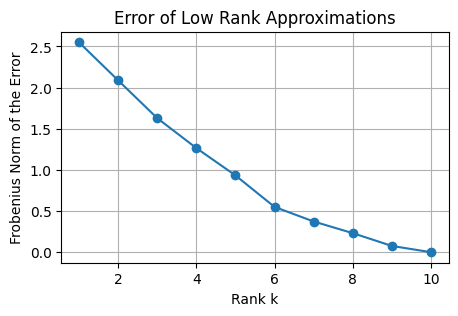

In [4]:
# 生成一個隨機矩陣
np.random.seed(0)
A = np.random.rand(10, 10)  # 10x10矩陣

# 進行奇異值分解
U, S, Vt = np.linalg.svd(A)

# 計算不同rank近似的誤差
errors = []
ranks = list(range(1, 11))
for k in ranks:
    S_k = np.diag(S[:k])
    A_k = U[:, :k] @ S_k @ Vt[:k, :]
    error = np.linalg.norm(A - A_k, 'fro')  # Frobenius範數
    errors.append(error)

# 繪製誤差圖表
plt.figure(figsize=(5, 3))
plt.plot(ranks, errors, marker='o')
plt.title('Error of Low Rank Approximations')
plt.xlabel('Rank k')
plt.ylabel('Frobenius Norm of the Error')
plt.grid(True)
plt.show()